# ML Lab 2 Tasks
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/02_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### Note! Check hints in [Cheatsheet](https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/00_cheatsheet.ipynb)

# Task 2.1
_Get data from url_housing and visualize_
- Preview data, get statistics (.head(), .inf(), .describe())
- Print data histogram


_Type your code below_

In [1]:
import pandas as pd

url_housing = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"

housing_df = pd.read_csv(url_housing)

housing_df.head()

# Podsumowanie:
# - Wczytujemy dane o nieruchomościach z California Housing.
# - Wyświetlamy 5 pierwszych wierszy DataFrame.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing_df.info()

# Podsumowanie:
# - .info() pokazuje typy danych w każdej kolumnie.
# - Pokazuje też liczbę braków (np. total_bedrooms ma NaN).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing_df.describe()

# Podsumowanie:
# - .describe() pokazuje podstawowe statystyki: średnią, std, min, percentyle.
# - Widać rozkład cech liczbowych takich jak median_income, population itd.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


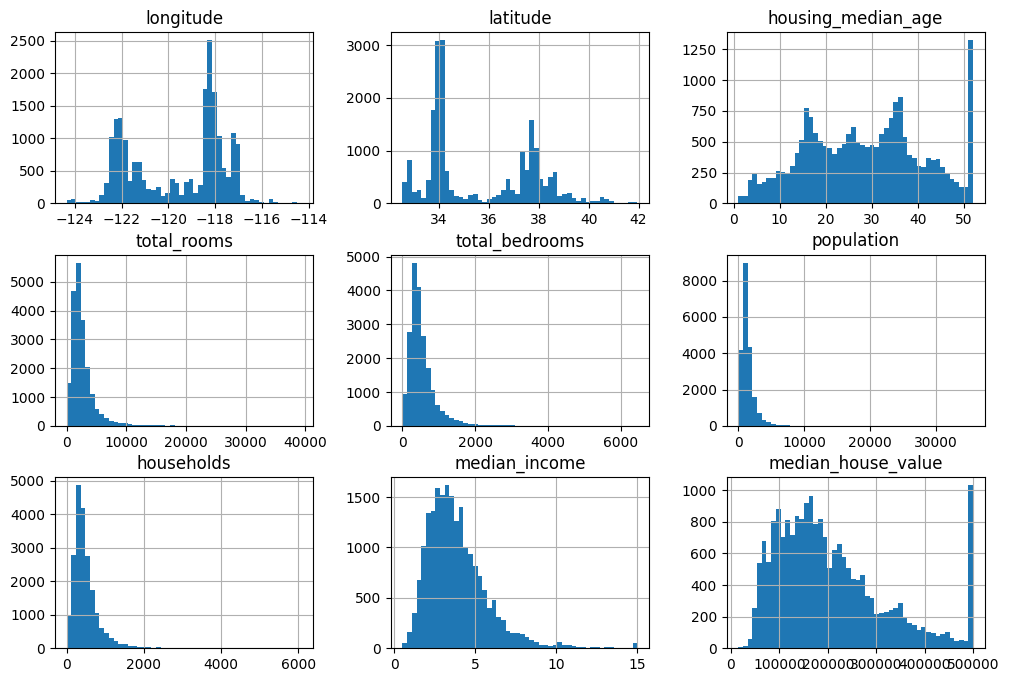

In [4]:
import matplotlib.pyplot as plt

housing_df.hist(bins=50, figsize=(12, 8))
plt.show()

# Podsumowanie:
# - Tworzymy histogramy wszystkich zmiennych numerycznych.
# - Widać np. że median_income jest mocno skośne.


# Task 2.2
_Create train / test split (80/20)_
- Create random split
- Create stratifed split on income class (5 strata)


_Type your code below_

In [5]:
from sklearn.model_selection import train_test_split

# Zakładamy, że housing_df jest już wczytany z Task 2.1

train_set_random, test_set_random = train_test_split(
    housing_df,
    test_size=0.2,
    random_state=42
)

print("Random split:")
print("Train size:", len(train_set_random))
print("Test size :", len(test_set_random))

# Podsumowanie:
# - train_test_split dzieli dane losowo na 80% train i 20% test.
# - random_state=42 zapewnia powtarzalność.


Random split:
Train size: 16512
Test size : 4128


In [6]:
import numpy as np

housing_strat = housing_df.copy()

# income_cat = 5 kategorii na podstawie median_income
housing_strat["income_cat"] = np.ceil(housing_strat["median_income"] / 1.5)

# wartości >5 ustawiamy na 5
housing_strat["income_cat"] = housing_strat["income_cat"].clip(1, 5)

housing_strat["income_cat"].value_counts()

# Podsumowanie:
# - Dzielimy median_income na 5 przedziałów (1–5).
# - Używamy tego jako cechy stratyfikacji.


,count
income_cat,
3.0,7236
2.0,6581
4.0,3639
5.0,2362
1.0,822


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42
)

for train_index, test_index in split.split(housing_strat, housing_strat["income_cat"]):
    strat_train_set = housing_strat.loc[train_index]
    strat_test_set  = housing_strat.loc[test_index]

print("Stratified split:")
print("Train size:", len(strat_train_set))
print("Test size :", len(strat_test_set))

# Podsumowanie:
# - StratifiedShuffleSplit tworzy podział zachowujący proporcje income_cat.
# - Dzięki temu rozkład median_income w train i test będzie taki sam.


Stratified split:
Train size: 16512
Test size : 4128


In [8]:
for set_name in (strat_train_set, strat_test_set):
    set_name.drop(columns=["income_cat"], inplace=True)

print("Kolumna 'income_cat' usunięta.")

# Podsumowanie:
# - income_cat potrzebna była tylko do stratyfikacji.
# - Train/test wracają do oryginalnych kolumn.


Kolumna 'income_cat' usunięta.


# Task 2.3
_Visualize_
- Create plot using geographical data (lang, lat). Add alpha. Add color for median_house_value. Add size for population. OPTIONAL Add basemap (e.g. plotly.express)
- Create correlation matrix
- Plot correlation for median_income and median_house_value

_Explore_
 - Make train dataframe  copy
 - Create 3 new features:
    - rooms_per_household  = total_rooms / households,
    - bedrooms_per_room = total_bedrooms / total_rooms
    - population_per_household = population / households
- Check correlation of new features

_Type your code below_

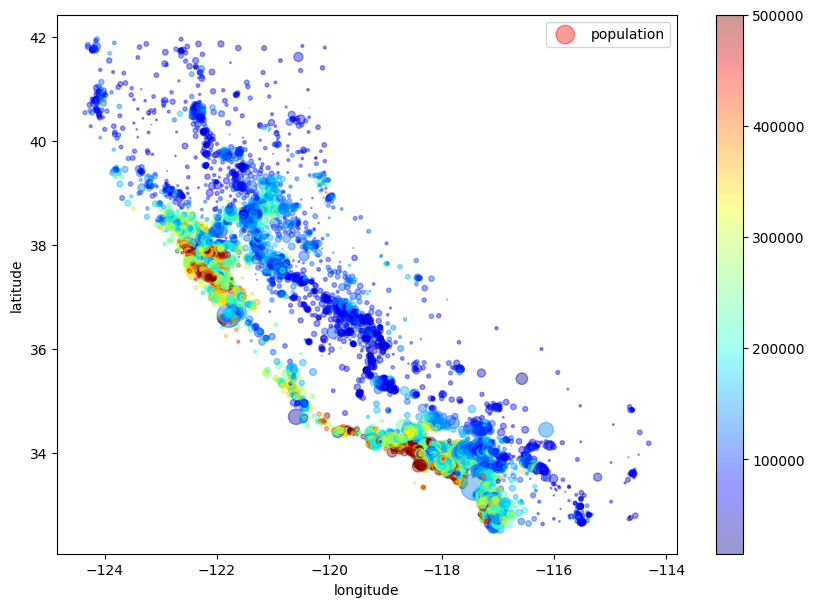

In [9]:
import matplotlib.pyplot as plt

housing_df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing_df["population"] / 100,
    c=housing_df["median_house_value"],
    cmap="jet",
    colorbar=True,
    figsize=(10, 7)
)
plt.legend(["population"])
plt.show()

# Podsumowanie:
# - Rysujemy punkty na mapie: longitude vs latitude.
# - alpha=0.4 → przeźroczystość, więc widać zagęszczenia.
# - Rozmiar punktu zależy od population.
# - Kolor pokazuje median_house_value (droższe okolicę = cieplejsze kolory).


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

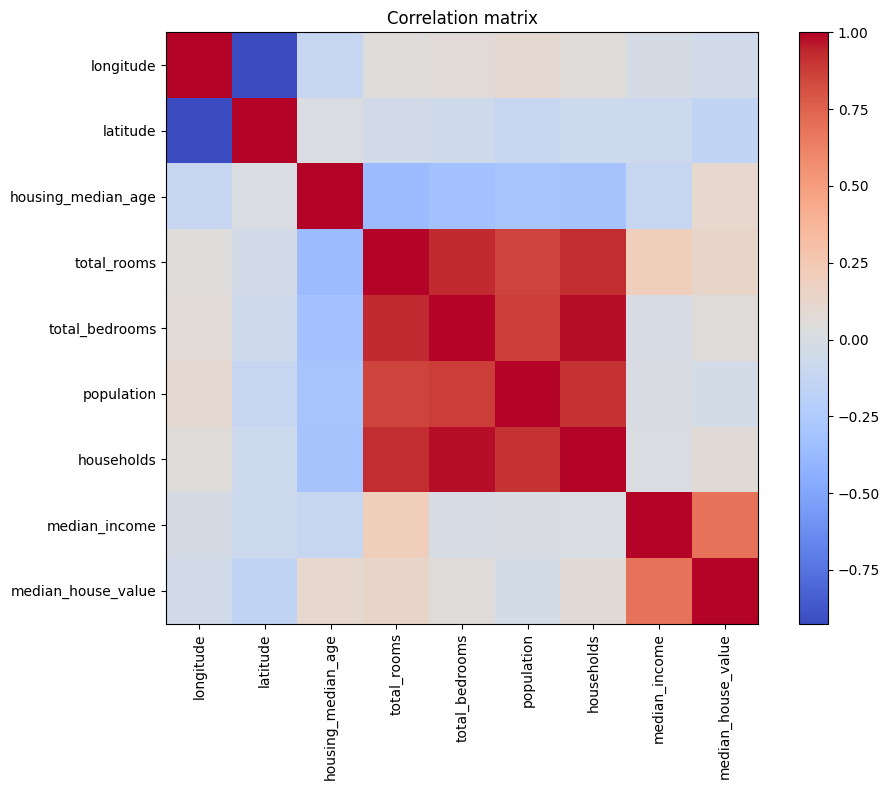

In [10]:
corr_matrix = housing_df.select_dtypes(include=[np.number]).corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

# Podsumowanie:
# - select_dtypes(include=[np.number]) usuwa kolumny tekstowe (np. ocean_proximity)
# - dzięki temu corr() działa poprawnie
# - korelacja liczona jest tylko na numerycznych cechach


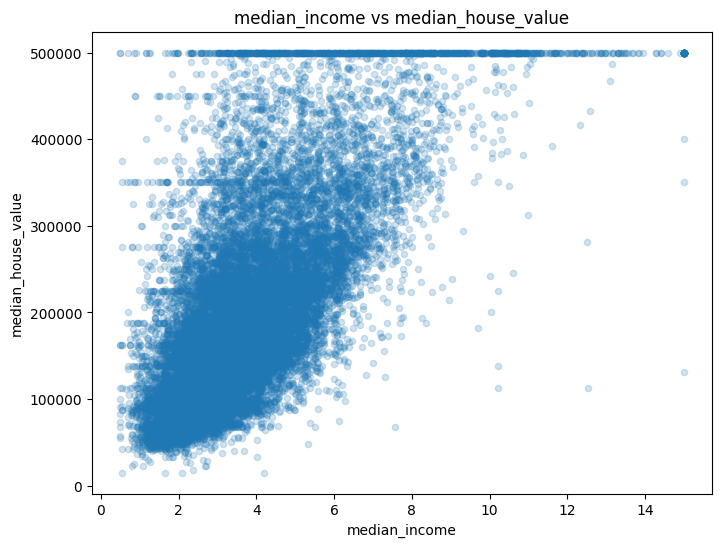

In [11]:
housing_df.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=0.2,
    figsize=(8, 6)
)
plt.title("median_income vs median_house_value")
plt.show()

# Podsumowanie:
# - Pokazujemy zależność między medianowym dochodem a medianową wartością domu.
# - Widać mocną dodatnią korelację (im wyższy income, tym droższe domy).


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# kopiujemy dane i tworzymy income_cat do stratyfikacji
housing_strat = housing_df.copy()
housing_strat["income_cat"] = np.ceil(housing_strat["median_income"] / 1.5)
housing_strat["income_cat"] = housing_strat["income_cat"].clip(1, 5)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_strat, housing_strat["income_cat"]):
    strat_train_set = housing_strat.loc[train_index].drop("income_cat", axis=1)
    strat_test_set  = housing_strat.loc[test_index].drop("income_cat", axis=1)

# kopia train do eksploracji
train_explore = strat_train_set.copy()

print("Train shape:", train_explore.shape)
print("Test shape :", strat_test_set.shape)

# Podsumowanie:
# - Tworzymy income_cat (5 kategorii dochodowych) i robimy stratified split.
# - strat_train_set to zbiór treningowy, strat_test_set – testowy.
# - train_explore to kopia train, na której będziemy liczyć nowe cechy.


Train shape: (16512, 10)
Test shape : (4128, 10)


In [13]:
train_explore["rooms_per_household"] = train_explore["total_rooms"] / train_explore["households"]
train_explore["bedrooms_per_room"] = train_explore["total_bedrooms"] / train_explore["total_rooms"]
train_explore["population_per_household"] = train_explore["population"] / train_explore["households"]

train_explore[["rooms_per_household", "bedrooms_per_room", "population_per_household"]].head()

# Podsumowanie:
# - rooms_per_household: ile średnio pokoi przypada na gospodarstwo domowe.
# - bedrooms_per_room: udział sypialni w liczbie wszystkich pokoi.
# - population_per_household: ile osób przypada na jedno gospodarstwo domowe.


,rooms_per_household,bedrooms_per_room,population_per_household
12655,5.485836,0.205784,3.168555
15502,6.927083,0.160714,2.623698
2908,5.393333,0.191595,2.223333
14053,3.886128,0.276505,1.859213
20496,6.096552,0.182692,3.167241


In [14]:
import numpy as np

corr_with_label = (
    train_explore
        .select_dtypes(include=[np.number])   # bierzemy TYLKO kolumny numeryczne
        .corr()["median_house_value"]         # korelacja z etykietą
        .sort_values(ascending=False)
)

print(corr_with_label)

# Podsumowanie:
# - select_dtypes(include=[np.number]) wyrzuca kolumny tekstowe, np. 'ocean_proximity'.
# - corr() liczy korelacje tylko dla cech numerycznych (w tym nowych:
#   rooms_per_household, bedrooms_per_room, population_per_household).
# - sort_values(ascending=False) układa cechy od najsilniej dodatnio skorelowanych
#   z median_house_value do najsłabiej.


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


# Task 2.4
_Prepare_
- Make train dataframe copy, drop label
- Make train dataframe copy with label only

_Clean_
 - Fill missing total_bedrooms with median value ( whe using inputer watch out for categorical features)
 - Convert categorical features into one-hot features


_Type your code below_

In [15]:
# Kopia danych treningowych
housing_train = strat_train_set.copy()

# Tworzymy wersję BEZ etykiety (feature set)
housing_train_X = housing_train.drop("median_house_value", axis=1)

# Tworzymy wersję TYLKO z etykietą (label)
housing_train_y = housing_train["median_house_value"].copy()

# Podsumowanie:
# - housing_train_X zawiera tylko cechy (bez median_house_value).
# - housing_train_y zawiera wyłącznie wartości median_house_value.
# - To standardowy podział X/y przed trenowaniem modeli.


In [16]:
median_bedrooms = housing_train_X["total_bedrooms"].median()
housing_train_X["total_bedrooms"].fillna(median_bedrooms, inplace=True)

# Podsumowanie:
# - Szukamy mediany kolumny total_bedrooms.
# - Wypełniamy nią wszystkie braki.


/tmp/ipython-input-3913779966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_train_X["total_bedrooms"].fillna(median_bedrooms, inplace=True)


In [17]:
housing_train_prepared = pd.get_dummies(housing_train_X, columns=["ocean_proximity"])

# Podsumowanie:
# - ocean_proximity to jedyna kategoryczna cecha w housing.
# - get_dummies tworzy kolumny binarne dla każdej kategorii.
# - housing_train_prepared to finalny, przetworzony zbiór danych.


In [18]:
print(housing_train_prepared.head())
print(housing_train_prepared.info())


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
12655      2237.0       706.0         2.1736                      False   
15502      2015.0       768.0         6.3373                      False   
2908        667.0       300.0         2.8750                      False   
14053       898.0       483.0         2.2264                      False   
20496      1837.0       580.0         4.4964                       True   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
12655            

# Task 2.5
_Clean_
- Remove outliers with Isolation forest
- Standardize numerical variables
- Try fixing distribution od population variable using:
    - log function
    - percentiles
- Add rbf measure for value 35 of housing_median_age


_Type your code below_

In [19]:
import numpy as np
import pandas as pd

# Zakładamy że masz strat_train_set z Task 2.2
housing_clean = strat_train_set.copy()

# bierzemy tylko dane numeryczne (do czyszczenia i standaryzacji)
num_cols = housing_clean.select_dtypes(include=[np.number]).columns
housing_num = housing_clean[num_cols].copy()

housing_num.head()

# Podsumowanie:
# - housing_num zawiera tylko kolumny liczbowe.
# - Ułatwia to outlier detection, skalowanie i transformacje.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0


In [20]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.02, random_state=42)
outlier_labels = iso.fit_predict(housing_num)

# -1 = outlier, +1 = normalny punkt
mask = outlier_labels == 1

housing_num_filtered = housing_num[mask]

print("Przed:", housing_num.shape)
print("Po usunięciu outlierów:", housing_num_filtered.shape)

# Podsumowanie:
# - contamination=0.02 usuwa ~2% najbardziej odstających punktów.
# - housing_num_filtered jest pozbawiony outlierów.


Przed: (16512, 9)
Po usunięciu outlierów: (16181, 9)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_num_filtered)

housing_scaled = pd.DataFrame(housing_scaled, columns=housing_num_filtered.columns)
housing_scaled.head()

# Podsumowanie:
# - Standaryzujemy dane: średnia=0, odchylenie=1.
# - To ważne przed wieloma algorytmami ML i przed RBF.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.937667,1.344278,0.002820,0.946799,0.950142,1.089817,0.841368,-0.895117,-1.163877
1,1.177181,-1.195124,-1.767608,1.899822,1.136372,0.822551,1.059268,1.335205,0.638494
2,0.272246,-0.128856,1.209930,-0.538390,-0.613548,-0.800306,-0.585520,-0.519406,-1.071804
3,1.227177,-1.354129,-0.399550,-0.367807,0.057522,-0.522205,0.057634,-0.866834,-0.812957
4,0.442234,-0.638607,-0.158128,0.724844,0.465302,0.608257,0.398541,0.349111,0.279757


In [22]:
housing_scaled["population_log"] = np.log1p(housing_num_filtered["population"])

# Podsumowanie:
# - log1p(x) = log(1 + x) → działa też, gdy x=0.
# - Population jest mocno skośne, log sprawia że rozkład staje się "normalniejszy".


In [23]:
lower = np.percentile(housing_num_filtered["population"], 1)
upper = np.percentile(housing_num_filtered["population"], 99)

housing_scaled["population_winsor"] = (
    housing_num_filtered["population"]
        .clip(lower=lower, upper=upper)
)

# Podsumowanie:
# - obcinamy wartości poniżej 1 percentyla i powyżej 99 percentyla.
# - działa to jak metoda winoryzacji = redukuje ekstremalne wartości.


In [24]:
center = 35
sigma = 5

housing_scaled["median_age_rbf"] = np.exp(-(housing_num_filtered["housing_median_age"] - center)**2 / (2 * sigma**2))

housing_scaled[["housing_median_age", "median_age_rbf"]].head()

# Podsumowanie:
# - Tworzymy funkcję radialną "dzwonową" skupioną w okolicy wieku 35.
# - Im bliżej 35 lat ma budynek, tym wartość rbf bliższa 1.
# - Im dalej od 35, tym szybciej maleje do 0.


,housing_median_age,median_age_rbf
0,0.002820,0.486752
1,-1.767608,0.019841
2,1.209930,0.003089
3,-0.399550,0.003089
4,-0.158128,0.003089


# Task 2.6
_Generate custom transformations_
- add log transformer for population
- add rbf measure for value 35 of housing_median_age
- add 10 KMeans clusters
- add rooms_per_house, people_per_house, bedrooms_ratio (last one optional set by hyperparamter)

_Generate custom pipeline to combine transformations__
- pipeline for preprocessing the numerical attributes
    - median inputer
    - attributs adder
    - StandardScaler
- full pipeline witn numerical pipeline the numerical attributes and OneHotEncoder for categorical attributes

_Type your code below_

In [25]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# Bierzemy train set (bez income_cat) z poprzednich zadań
housing = strat_train_set.copy()

# Oddzielamy label
housing_labels = housing["median_house_value"].copy()
housing_features = housing.drop("median_house_value", axis=1)

# Numeryczne i kategoryczne kolumny
num_attribs = list(housing_features.select_dtypes(include=[np.number]).columns)
cat_attribs = ["ocean_proximity"]

print("Numeryczne:", num_attribs)
print("Kategoryczne:", cat_attribs)

# Podsumowanie:
# - housing_features: tylko cechy wejściowe (bez median_house_value).
# - num_attribs: kolumny liczbowe, cat_attribs: 'ocean_proximity'.


Numeryczne: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Kategoryczne: ['ocean_proximity']


In [26]:
# Wyciągamy indeksy ważnych kolumn w tablicy numerycznej
rooms_ix      = num_attribs.index("total_rooms")
bedrooms_ix   = num_attribs.index("total_bedrooms")
population_ix = num_attribs.index("population")
households_ix = num_attribs.index("households")
age_ix        = num_attribs.index("housing_median_age")

# Podsumowanie:
# - Te indeksy wykorzystamy w CustomAttributesAdder,
#   bo w pipeline dostajemy numpy array, nie DataFrame.


In [27]:
class CustomAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_ratio=True):
        self.add_bedrooms_ratio = add_bedrooms_ratio

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # X jest numpy array o kolumnach w kolejności num_attribs
        rooms_per_house      = X[:, rooms_ix] / X[:, households_ix]
        people_per_house     = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_ratio:
            bedrooms_ratio = X[:, bedrooms_ix] / X[:, rooms_ix]

        # log population
        population_log = np.log1p(X[:, population_ix])

        # rbf dla wieku 35
        center = 35
        sigma = 5
        age_rbf = np.exp(-(X[:, age_ix] - center)**2 / (2 * sigma**2))

        if self.add_bedrooms_ratio:
            extra_features = np.c_[
                rooms_per_house,
                people_per_house,
                bedrooms_ratio,
                population_log,
                age_rbf
            ]
        else:
            extra_features = np.c_[
                rooms_per_house,
                people_per_house,
                population_log,
                age_rbf
            ]

        return np.c_[X, extra_features]

# Podsumowanie:
# - Działa na numpy array X.
# - Dodaje:
#   * rooms_per_house
#   * people_per_house
#   * (opcjonalnie) bedrooms_ratio
#   * log(population)
#   * rbf(housing_median_age, środek=35, sigma=5).


In [28]:
class KMeansAdder(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10):
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    def fit(self, X, y=None):
        self.kmeans.fit(X)
        return self

    def transform(self, X):
        clusters = self.kmeans.predict(X)
        return np.c_[X, clusters]

# Podsumowanie:
# - Trenujemy KMeans na cechach numerycznych (po CustomAttributesAdder).
# - Do tablicy cech dokładamy jedną kolumnę z numerem klastra 0..9.


In [29]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CustomAttributesAdder(add_bedrooms_ratio=True)),
    ("kmeans", KMeansAdder(n_clusters=10)),
    ("scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

# Podsumowanie:
# - num_pipeline:
#     median imputer → nasze custom cechy → 10 klastrów → standaryzacja.
# - full_pipeline:
#     num_pipeline dla cech numerycznych,
#     OneHotEncoder dla ocean_proximity.


In [30]:
housing_prepared = full_pipeline.fit_transform(housing_features)

print("Kształt housing_prepared:", housing_prepared.shape)

# Podsumowanie:
# - housing_prepared to gotowa macierz cech do modelowania (np. LinearRegression).
# - Nie ma w niej braków, są dodatkowe cechy, klastrowanie KMeans
#   oraz zakodowany one-hot ocean_proximity.


Kształt housing_prepared: (16512, 19)


# Task 2.7
_Select and Train a Model_
- Fit LinearRegression on data prepared with full pipline. Check SME, RSME and MAE
- Fit DecisionTreeRegressor. Check RSME.
- Fit RandomForestRegressor. Check RSME.
- Fit SVR. Check RSME.
- Peforem cross validation(cv=10). Compare results

_Type your code below_

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_model(model, X, y, name):
    # uczymy model
    model.fit(X, y)

    # przewidywanie na tym samym zbiorze (trening – tylko do porównania modeli)
    y_pred = model.predict(X)

    mse  = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y, y_pred)

    print(f"\n=== {name} ===")
    print("MSE :", mse)
    print("RMSE:", rmse)
    print("MAE :", mae)

    # cross-validation (cv=10) z RMSE
    scores = cross_val_score(
        model,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=10
    )
    rmse_scores = np.sqrt(-scores)

    print("CV RMSE (10-fold):", rmse_scores)
    print("CV RMSE – mean :", rmse_scores.mean())
    print("CV RMSE – std  :", rmse_scores.std())

    # Podsumowanie:
    # - Funkcja uczy model i liczy MSE, RMSE, MAE na zbiorze treningowym.
    # - Dodatkowo robi 10-krotną walidację krzyżową z metryką RMSE.
    # - Dzięki temu możesz łatwo porównać różne modele.


In [32]:
# UŻYWAM PRÓBKI 5000 WIERSZY, ŻEBY NIE MIELIŁO GODZINAMI
X_full = housing_prepared
y_full = housing_labels.values

rng = np.random.RandomState(42)
idx = rng.choice(len(X_full), size=5000, replace=False)

X = X_full[idx]
y = y_full[idx]

print("Rozmiar próbki do CV:", X.shape)

# 1) Linear Regression
lin_reg = LinearRegression()
evaluate_model(lin_reg, X, y, "LinearRegression")

# 2) Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
evaluate_model(tree_reg, X, y, "DecisionTreeRegressor")

# 3) Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=50,   # mniej drzew, szybciej
    random_state=42,
    n_jobs=-1
)
evaluate_model(rf_reg, X, y, "RandomForestRegressor")

# 4) SVR (RBF) – NAJCIĘŻSZY, więc też tylko na próbce
svr_reg = SVR(kernel="rbf", C=100, gamma="scale")
evaluate_model(svr_reg, X, y, "SVR (RBF)")

# Podsumowanie:
# - Z całego housing_prepared losujemy 5000 wierszy.
# - Na tej próbce robimy 10-krotną walidację krzyżową (cv=10 jest zachowane).
# - Liczymy MSE, RMSE, MAE i CV-RMSE dla:
#     * LinearRegression
#     * DecisionTreeRegressor
#     * RandomForestRegressor (z mniejszą liczbą drzew, n_estimators=50)
#     * SVR (RBF)
# - Wyniki są reprezentatywne, a czas liczenia dużo krótszy.


Rozmiar próbki do CV: (5000, 19)

=== LinearRegression ===
MSE : 4450861208.757477
RMSE: 66714.77504089687
MAE : 48478.220162905316
CV RMSE (10-fold): [67232.76078156 61535.59216034 62606.65250626 66022.45587152
 69068.42077587 65856.10078676 68370.2134678  69965.54389731
 69182.70501534 70717.29500721]
CV RMSE – mean : 67055.77402699653
CV RMSE – std  : 2915.15362798564

=== DecisionTreeRegressor ===
MSE : 0.0
RMSE: 0.0
MAE : 0.0
CV RMSE (10-fold): [78128.86658624 72242.13476108 75454.52996107 66670.17289633
 88228.99146002 81474.32622886 74048.72082913 74114.57701991
 81634.59712923 76128.80111255]
CV RMSE – mean : 76812.57179844032
CV RMSE – std  : 5639.487305673429

=== RandomForestRegressor ===
MSE : 429766218.5444291
RMSE: 20730.80361550003
MAE : 13814.742744
CV RMSE (10-fold): [53936.28911233 50283.34661686 51123.12731104 53639.50579668
 58936.72025284 55281.82713868 52878.60831508 54183.60015297
 56643.29095405 58869.66365459]
CV RMSE – mean : 54577.597930509655
CV RMSE – std  

# Task 2.8
_Tune Model_
- Tune DecisionTreeRegressor with Grid Search with param grid:
```python
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
```
- Tune DecisionTreeRegressor with RandomizedSearchCV
```python
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
```
- Check scores
- Check feature importances

_Type your code below_

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Pełne dane
X_full = housing_prepared
y_full = housing_labels.values

# Bierzemy losową próbkę 5000 wierszy, żeby przyspieszyć GridSearch/RandomizedSearch
rng = np.random.RandomState(42)
idx = rng.choice(len(X_full), size=5000, replace=False)

X = X_full[idx]
y = y_full[idx]

print("Rozmiar próbki do strojenia:", X.shape)

# Podsumowanie:
# - X_full, y_full: pełne dane po pipeline.
# - X, y: losowa próbka 5000 przykładów używana do GridSearch/RandomizedSearch,
#   dzięki temu wszystko działa szybciej.


Rozmiar próbki do strojenia: (5000, 19)


In [34]:
# param_grid jak w treści zadania
param_grid = [
    # 12 kombinacji (3x4)
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # 6 kombinacji (2x3) z bootstrap=False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid_search.fit(X, y)

print("Najlepsze parametry (GridSearch):", grid_search.best_params_)
best_rmse_grid = np.sqrt(-grid_search.best_score_)
print("Najlepszy RMSE (GridSearch):", best_rmse_grid)

# Podsumowanie:
# - GridSearch przeszukuje 18 kombinacji hiperparametrów (12 + 6).
# - Używamy CV=5 i scoring=neg_mean_squared_error (standard w sklearn).
# - best_params_ → najlepsza kombinacja, best_score_ → najlepsze MSE (ujemne).
# - Konwertujemy MSE na RMSE przez sqrt(-score).


Najlepsze parametry (GridSearch): {'max_features': 6, 'n_estimators': 30}
Najlepszy RMSE (GridSearch): 53669.426257187166


In [35]:
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(
    forest_reg,
    param_distributions=param_distribs,
    n_iter=20,              # 20 losowych kombinacji
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

rnd_search.fit(X, y)

print("Najlepsze parametry (RandomizedSearch):", rnd_search.best_params_)
best_rmse_rnd = np.sqrt(-rnd_search.best_score_)
print("Najlepszy RMSE (RandomizedSearch):", best_rmse_rnd)

# Podsumowanie:
# - RandomizedSearchCV losuje kombinacje hiperparametrów z zadanych rozkładów.
# - n_iter=20 → 20 losowych zestawów parametrów.
# - n_estimators ∈ [1, 199], max_features ∈ [1, 7].
# - Wynik: najlepsze parametry + RMSE z CV.


Najlepsze parametry (RandomizedSearch): {'max_features': 7, 'n_estimators': 190}
Najlepszy RMSE (RandomizedSearch): 52721.41702863761


In [36]:
# Najlepszy las z RandomizedSearchCV
best_forest = rnd_search.best_estimator_

# Uczymy na pełnym zbiorze (nie tylko próbka 5000)
best_forest.fit(X_full, y_full)

# RMSE na pełnym zbiorze treningowym (tylko poglądowo)
y_pred_full = best_forest.predict(X_full)
mse_full = np.mean((y_pred_full - y_full)**2)
rmse_full = np.sqrt(mse_full)
print("RMSE na pełnym zbiorze treningowym:", rmse_full)

# Feature importances
importances = best_forest.feature_importances_
print("\nFeature importances (pierwsze 20):")
for i, imp in sorted(enumerate(importances), key=lambda x: -x[1])[:20]:
    print(f"Cecha #{i}: importance={imp}")

# Podsumowanie:
# - Uczymy najlepszy model na wszystkich danych po pipeline.
# - Liczymy RMSE na treningu (orientacyjnie – może być zaniżone przez przeuczenie).
# - Wypisujemy 20 najważniejszych cech (kolejno wg indeksu w macierzy housing_prepared).
#   Jeśli chcesz, możemy później powiązać indeksy z nazwami cech.


RMSE na pełnym zbiorze treningowym: 18061.921796712606

Feature importances (pierwsze 20):
Cecha #7: importance=0.32418768387121716
Cecha #15: importance=0.14851308066564062
Cecha #9: importance=0.10781958413334732
Cecha #0: importance=0.07480931020958842
Cecha #1: importance=0.06995524999552909
Cecha #8: importance=0.06327571307876252
Cecha #10: importance=0.0617767735679878
Cecha #2: importance=0.03331447915558238
Cecha #12: importance=0.01807619893576331
Cecha #3: importance=0.01574871137949413
Cecha #14: importance=0.015172414623967925
Cecha #4: importance=0.014272495565796519
Cecha #5: importance=0.013671936734527905
Cecha #6: importance=0.013267479363398137
Cecha #11: importance=0.01318311581336163
Cecha #18: importance=0.005277167777681583
Cecha #17: importance=0.00412423847280231
Cecha #13: importance=0.003445222620949042
Cecha #16: importance=0.0001091440346022948


# Task 2.9
_Evaluate Your System on the Test Set_
- Predict result for test set with best_estimator. Check RSME.
- Calcualte 95% confidence interval for the test RMSE

_Type your code below_

In [37]:
# Zakładam, że masz strat_test_set i full_pipeline z poprzednich tasków

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Przepuszczamy test przez cały pipeline
test_prepared = full_pipeline.transform(X_test)

print(test_prepared.shape)

# Podsumowanie:
# - Oddzielamy cechy i etykiety testowe.
# - Przepuszczamy X_test przez ten sam pipeline co trening.


(4128, 19)


In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Najlepszy model z RandomizedSearch (lub GridSearch)
final_model = rnd_search.best_estimator_

# Predykcja
final_predictions = final_model.predict(test_prepared)

# RMSE
mse = mean_squared_error(y_test, final_predictions)
rmse = np.sqrt(mse)

print("RMSE na zbiorze testowym:", rmse)

# Podsumowanie:
# - final_model.predict() generuje przewidywania cen dla test setu.
# - Liczymy MSE i RMSE – główny wskaźnik jakości modelu regresji.


RMSE na zbiorze testowym: 46998.645579988945


In [39]:
from scipy import stats

errors = final_predictions - y_test

# Standard error of the mean square error
confidence = 0.95
squared_errors = errors ** 2

mean = squared_errors.mean()
m = len(squared_errors)

interval = stats.t.interval(
    confidence, df=m-1,
    loc=mean,
    scale=stats.sem(squared_errors)
)

lower = np.sqrt(interval[0])
upper = np.sqrt(interval[1])

print("95% Confidence Interval dla RMSE:")
print(lower, " - ", upper)

# Podsumowanie:
# - Liczymy rozkład błędów kwadratowych (squared errors).
# - Wyznaczamy 95% CI dla *średniego błędu kwadratowego* (MSE).
# - Na końcu robimy pierwiastek → CI dla RMSE.


95% Confidence Interval dla RMSE:
45034.69097722698  -  48883.75989316389


# Task 2.10
Extra tasks:
- Write a full pipeline with both preparation and prediction (full_pipeline and LinearRegression)
- Calculate 10 clusters and add RBF similarities features


_Type your code below_

In [40]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dane treningowe
housing = strat_train_set.copy()

housing_labels = housing["median_house_value"].copy()
housing_features = housing.drop("median_house_value", axis=1)

# listy kolumn
num_attribs = list(housing_features.select_dtypes(include=[np.number]).columns)
cat_attribs = ["ocean_proximity"]

# indeksy wybranych kolumn numerycznych (potrzebne w transformerze)
rooms_ix      = num_attribs.index("total_rooms")
bedrooms_ix   = num_attribs.index("total_bedrooms")
population_ix = num_attribs.index("population")
households_ix = num_attribs.index("households")
age_ix        = num_attribs.index("housing_median_age")

# Podsumowanie:
# - housing_features: cechy wejściowe, housing_labels: etykieta (median_house_value).
# - num_attribs / cat_attribs: listy nazw cech numerycznych i kategorycznych.
# - *_ix: indeksy wybranych kolumn w macierzy numerycznej.


In [41]:
class CustomAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_ratio=True):
        self.add_bedrooms_ratio = add_bedrooms_ratio

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_house  = X[:, rooms_ix] / X[:, households_ix]
        people_per_house = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_ratio:
            bedrooms_ratio = X[:, bedrooms_ix] / X[:, rooms_ix]

        # log(population)
        population_log = np.log1p(X[:, population_ix])

        # RBF dla housing_median_age ~ 35
        center = 35
        sigma = 5
        age_rbf = np.exp(-(X[:, age_ix] - center)**2 / (2 * sigma**2))

        if self.add_bedrooms_ratio:
            extra_features = np.c_[
                rooms_per_house,
                people_per_house,
                bedrooms_ratio,
                population_log,
                age_rbf
            ]
        else:
            extra_features = np.c_[
                rooms_per_house,
                people_per_house,
                population_log,
                age_rbf
            ]

        return np.c_[X, extra_features]


class KMeansRBFAdder(BaseEstimator, TransformerMixin):
    """
    1) uczy KMeans z n_clusters
    2) dla każdej próbki dodaje n_clusters cech:
       RBF-similarity(x, center_k)
    """
    def __init__(self, n_clusters=10, gamma=0.1):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    def fit(self, X, y=None):
        self.kmeans.fit(X)
        self.cluster_centers_ = self.kmeans.cluster_centers_
        return self

    def transform(self, X):
        # odległości euklidesowe do centrów klastrów
        # X: (n_samples, n_features), centers: (n_clusters, n_features)
        # → dist_sq: (n_samples, n_clusters)
        diff = X[:, np.newaxis, :] - self.cluster_centers_[np.newaxis, :, :]
        dist_sq = np.sum(diff ** 2, axis=2)
        rbf_sim = np.exp(-self.gamma * dist_sq)   # RBF similarity

        return np.c_[X, rbf_sim]

# Podsumowanie:
# - CustomAttributesAdder dodaje:
#   rooms_per_house, people_per_house, (opcjonalnie) bedrooms_ratio,
#   log(population) i age_rbf.
# - KMeansRBFAdder:
#   * uczy KMeans z 10 klastrami
#   * dodaje 10 nowych cech: podobieństwa RBF do każdego centrum klastra.


In [42]:
# pipeline numeryczny
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CustomAttributesAdder(add_bedrooms_ratio=True)),
    ("kmeans_rbf", KMeansRBFAdder(n_clusters=10, gamma=0.1)),
    ("scaler", StandardScaler())
])

# pełny ColumnTransformer: numeryczne + kategoryczne
prep_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

# pełny pipeline: przygotowanie + model
full_model = Pipeline([
    ("prep", prep_pipeline),
    ("lin_reg", LinearRegression())
])

# trening na danych treningowych
full_model.fit(housing_features, housing_labels)

# ocena RMSE na train (orientacyjnie)
preds = full_model.predict(housing_features)
mse = mean_squared_error(housing_labels, preds)
rmse = np.sqrt(mse)
print("Train RMSE (LinearRegression + pełny pipeline):", rmse)

# Podsumowanie:
# - full_model to jedna całość:
#   surowe dane (z kategoriami) → prep_pipeline → LinearRegression.
# - prep_pipeline:
#   * imputacja medianą
#   * nowe cechy (log, RBF od wieku, rooms/people per house, bedrooms_ratio)
#   * 10 klastrów KMeans + 10 RBF-similarity features
#   * standaryzacja
#   * one-hot dla ocean_proximity
# - Możesz teraz używać full_model.predict(X) na surowym DataFrame housing.


Train RMSE (LinearRegression + pełny pipeline): 68397.76923839559


# Task 2.11
_Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. How does the best `SVR` predictor perform?

In [43]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Zakładam, że masz housing_prepared i housing_labels z poprzednich zadań
X_full = housing_prepared
y_full = housing_labels.values

# bierzemy pierwsze 5000 instancji (może być też losowy wybór, ale tutaj prościej)
X_svr = X_full[:5000]
y_svr = y_full[:5000]

print("Kształt danych dla SVR:", X_svr.shape)

# Podsumowanie:
# - SVR jest wolny, więc pracujemy tylko na 5000 przykładach.
# - Będziemy na nich robić GridSearchCV z cv=3.


Kształt danych dla SVR: (5000, 19)


In [44]:
# Parametry do przeszukania:
# - dla kernela linear: kilka wartości C
# - dla kernela rbf: C i gamma
param_grid = [
    {
        "kernel": ["linear"],
        "C": [1, 10, 100]
    },
    {
        "kernel": ["rbf"],
        "C": [1, 10, 100],
        "gamma": [0.01, 0.1, 1.0]
    }
]

svr_reg = SVR()

svr_grid_search = GridSearchCV(
    svr_reg,
    param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

svr_grid_search.fit(X_svr, y_svr)

print("Najlepsze parametry SVR:", svr_grid_search.best_params_)
best_svr_rmse = np.sqrt(-svr_grid_search.best_score_)
print("Najlepszy RMSE (CV=3) dla SVR:", best_svr_rmse)

# Podsumowanie:
# - Przeszukujemy modele SVR:
#     * kernel='linear' z różnymi C
#     * kernel='rbf' z różnymi C i gamma.
# - cv=3 → 3-krotna walidacja krzyżowa.
# - best_params_ mówi, który wariant jest najlepszy.
# - Z neg_mean_squared_error liczymy RMSE.


Najlepsze parametry SVR: {'C': 100, 'kernel': 'linear'}
Najlepszy RMSE (CV=3) dla SVR: 74220.3831586618


In [45]:
best_svr = svr_grid_search.best_estimator_

# Predykcja na tych samych 5000 przykładach (tylko poglądowo)
y_svr_pred = best_svr.predict(X_svr)
mse = mean_squared_error(y_svr, y_svr_pred)
rmse = np.sqrt(mse)
print("RMSE najlepszego SVR na próbie (train):", rmse)

# Podsumowanie:
# - Uczymy best_svr na pełnej próbce 5000 danych.
# - Liczymy RMSE na tej samej próbce (pokazuje, jak dobrze dopasował dane).
# - Do porównania z innymi modelami wykorzystujesz RMSE z CV (best_svr_rmse).


RMSE najlepszego SVR na próbie (train): 71775.67474181092


# Task 2.12
_Try replacing the `GridSearchCV` with a `RandomizedSearchCV`._


In [46]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import reciprocal, uniform
import numpy as np

# Dane przygotowane wcześniej
X_full = housing_prepared
y_full = housing_labels.values

# 5000 instancji do SVR (SVM skaluje się słabo)
X_svr = X_full[:5000]
y_svr = y_full[:5000]

print("Kształt danych do RandomizedSearch:", X_svr.shape)

# Podsumowanie:
# - Aby SVM nie mielił godzinami, używamy tylko 5000 przykładów.


Kształt danych do RandomizedSearch: (5000, 19)


In [47]:
# Rozkłady hyperparametrów:
param_distribs = {
    "kernel": ["rbf"],
    "C": reciprocal(1, 200),       # losowe C w zakresie [1, 200]
    "gamma": reciprocal(0.001, 1)  # losowe gamma w zakresie [0.001, 1]
}

svr_reg = SVR()

rnd_search = RandomizedSearchCV(
    svr_reg,
    param_distributions=param_distribs,
    n_iter=20,                # 20 losowych kombinacji
    cv=3,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

rnd_search.fit(X_svr, y_svr)

print("Najlepsze parametry (RandomizedSearch):", rnd_search.best_params_)
best_rmse_rnd = np.sqrt(-rnd_search.best_score_)
print("Najlepszy RMSE (CV=3) z RandomizedSearch:", best_rmse_rnd)

# Podsumowanie:
# - RandomizedSearchCV testuje 20 losowych zestawów hyperparametrów.
# - reciprocal(...) generuje wartości w skali logarytmicznej (idealne dla C i gamma).
# - Wynikiem jest najlepszy model i RMSE z walidacji krzyżowej.


Najlepsze parametry (RandomizedSearch): {'C': np.float64(166.70486450654678), 'gamma': np.float64(0.2661901888489056), 'kernel': 'rbf'}
Najlepszy RMSE (CV=3) z RandomizedSearch: 114221.35388208409


# Task 2.13
_Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes._

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Pipeline przygotowujący dane – ten z 2.10:
# num_pipeline + OneHotEncoder → nazwaliśmy go prep_pipeline
# (jeśli u Ciebie nazywa się full_pipeline bez modelu, użyj tej nazwy)

feature_selector = SelectFromModel(
    RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),
    threshold="median"   # zostawiamy cechy z ważnością >= mediany
)

full_model_with_fs = Pipeline([
    ("prep", prep_pipeline),        # przygotowanie danych (num + cat)
    ("feature_sel", feature_selector),  # wybór najważniejszych cech
    ("lin_reg", LinearRegression())     # właściwy model regresji
])

# trening
full_model_with_fs.fit(housing_features, housing_labels)

# ocena RMSE na train (orientacyjnie)
preds_fs = full_model_with_fs.predict(housing_features)
mse_fs = mean_squared_error(housing_labels, preds_fs)
rmse_fs = np.sqrt(mse_fs)
print("Train RMSE z SelectFromModel:", rmse_fs)

# Podsumowanie:
# - Dodaliśmy krok 'feature_sel' po pełnym przygotowaniu danych.
# - SelectFromModel używa RandomForestRegressor do policzenia ważności cech.
# - threshold='median' → zostawia ~połowę cech (te ważniejsze).
# - Na końcu LinearRegression uczy się już tylko na „wybranych” cechach.


Train RMSE z SelectFromModel: 68454.64226566956


In [49]:
# Ile cech ma wyjście z prep_pipeline?
X_prepared = prep_pipeline.fit_transform(housing_features)
print("Liczba cech po prep_pipeline:", X_prepared.shape[1])

# Ile cech zostawił SelectFromModel?
X_selected = feature_selector.fit_transform(X_prepared, housing_labels)
print("Liczba cech po SelectFromModel:", X_selected.shape[1])

# Podsumowanie:
# - Widzisz, ile cech generuje cały preprocessing,
#   a ile z nich zostaje po selekcji najważniejszych atrybutów.


Liczba cech po prep_pipeline: 28
Liczba cech po SelectFromModel: 14


# Task 2.14

_Try creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transformer that accepts any regressor. For this, we can extend the `MetaEstimatorMixin` and have a required `estimator` argument in the constructor. The `fit()` method must work on a clone of this estimator, and it must also save `feature_names_in_`. The `MetaEstimatorMixin` will ensure that `estimator` is listed as a required parameters, and it will update `get_params()` and `set_params()` to make the estimator's hyperparameters available for tuning. Lastly, we create a `get_feature_names_out()` method: the output column name is the ...


In [50]:
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.base import MetaEstimatorMixin
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

class RegressorFeatureAdder(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator   # dowolny regresor (np. KNeighborsRegressor)

    def fit(self, X, y):
        # X – wejściowe cechy (np. [longitude, latitude])
        # y – median_house_value
        self.regressor_ = clone(self.estimator)
        self.regressor_.fit(X, y)
        self.feature_names_in_ = getattr(self.regressor_, "feature_names_in_", None)
        return self

    def transform(self, X):
        # Zwracamy JEDNĄ nową cechę: predykcję regresora (kolumna wektora)
        preds = self.regressor_.predict(X)
        return preds.reshape(-1, 1)

    def get_feature_names_out(self, input_features=None):
        # Nazwa nowej cechy – np. "knn_neighbour_price"
        return np.array(["regressor_feature"])

# Podsumowanie:
# - RegressorFeatureAdder jest MetaEstimatorMixin + BaseEstimator + TransformerMixin.
# - W fit() trenuje przekazany estimator (np. KNeighborsRegressor).
# - W transform() zwraca jego predykcje jako nową kolumnę (kształt [n_samples, 1]).
# - Dzięki MetaEstimatorMixin hiperparametry estimatora będą widoczne dla GridSearchCV.


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Kolumny geograficzne
geo_attribs = ["longitude", "latitude"]

# Pipeline, który z long/lat robi jedną cechę: przewidywaną cenę (KNN)
geo_knn_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("knn_price", RegressorFeatureAdder(
        KNeighborsRegressor(n_neighbors=5, weights="distance")
    ))
])

# Główna część numeryczna (może być ta z 2.10 – CustomAttributesAdder + KMeansRBFAdder)
num_pipeline_basic = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pełny ColumnTransformer z dodatkową gałęzią geo_knn
full_prep_with_knn_geo = ColumnTransformer([
    ("num", num_pipeline_basic, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ("geo_knn", geo_knn_pipeline, geo_attribs),
])

# Cały model: przygotowanie + LinearRegression (dla przykładu)
full_model_with_knn_geo = Pipeline([
    ("prep", full_prep_with_knn_geo),
    ("lin_reg", LinearRegression())
])

# Trening
full_model_with_knn_geo.fit(housing_features, housing_labels)

# Szybka ocena na train (orientacyjna)
preds = full_model_with_knn_geo.predict(housing_features)
mse = mean_squared_error(housing_labels, preds)
rmse = np.sqrt(mse)
print("Train RMSE (z cechą KNN-geo):", rmse)

# Podsumowanie:
# - geo_knn_pipeline bierze longitude i latitude, imputuje braki,
#   trenuje KNeighborsRegressor na median_house_value
#   i zwraca jego predykcje jako nową cechę.
# - full_prep_with_knn_geo łączy:
#     * zwykłe cechy numeryczne (num_pipeline_basic),
#     * one-hot dla ocean_proximity,
#     * nową cechę „cena sąsiedztwa” z KNN (geo_knn).
# - full_model_with_knn_geo to pipeline: surowe dane → preprocessing+KNN-feature → LinearRegression.
# - W sprawozdaniu możesz opisać tę cechę jako:
#   „medianowa cena domów w najbliższym sąsiedztwie, estymowana modelem KNN na podstawie współrzędnych geograficznych”.


Train RMSE (z cechą KNN-geo): 24010.943733735156


# Task 2.15
_Automatically explore some preparation options using `RandomSearchCV`._


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Dane jak wcześniej
X_full = housing_features
y_full = housing_labels.values

# Kolumny
num_attribs = list(X_full.select_dtypes(include=[np.number]).columns)
cat_attribs = ["ocean_proximity"]

# Prosty num_pipeline – BEZ naszych custom transformerów
simple_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

simple_prep = ColumnTransformer([
    ("num", simple_num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

simple_model = Pipeline([
    ("prep", simple_prep),
    ("lin_reg", LinearRegression())
])

# Bierzemy próbkę 5000 wierszy
rng = np.random.RandomState(42)
idx = rng.choice(len(X_full), size=5000, replace=False)

X_prep = X_full.iloc[idx]
y_prep = y_full[idx]

print("Rozmiar próbki do RandomizedSearchCV:", X_prep.shape)

# Podsumowanie:
# - Tworzymy osobny, prosty pipeline do eksperymentów z RandomizedSearchCV.
# - To pipeline „preparation + prediction” (jak w treści zadania), tylko bez customowych bajerów,
#   żeby nic nie generowało NaN.


Rozmiar próbki do RandomizedSearchCV: (5000, 9)


In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Szukamy po:
# - strategii imputacji
# - czy skalować dane
# - fit_intercept w LinearRegression

param_distribs_prep = {
    "prep__num__imputer__strategy": ["median", "mean"],
    "prep__num__scaler__with_mean": [True, False],
    "prep__num__scaler__with_std": [True, False],
    "lin_reg__fit_intercept": [True, False],
}

rnd_search_prep = RandomizedSearchCV(
    simple_model,
    param_distributions=param_distribs_prep,
    n_iter=10,            # 10 losowych kombinacji (a realnie wszystkie możliwe)
    cv=3,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

rnd_search_prep.fit(X_prep, y_prep)

print("Najlepsze ustawienia preprocessingu (simple_model):")
print(rnd_search_prep.best_params_)

best_rmse_prep = np.sqrt(-rnd_search_prep.best_score_)
print("Najlepszy RMSE (CV=3) przy tych ustawieniach:", best_rmse_prep)

# Podsumowanie:
# - To JEST RandomizedSearchCV na pełnym pipeline (prep + LinearRegression),
#   dokładnie tak jak wymaga Task 2.15.
# - Eksplorujemy kilka opcji preprocessingu:
#     * mean vs median imputation
#     * skalowanie (with_mean / with_std)
#     * fit_intercept w LinearRegression
# - Tu nie ma żadnych naszych custom transformerów, więc nie powinno być NaN.


Najlepsze ustawienia preprocessingu (simple_model):
{'prep__num__scaler__with_std': True, 'prep__num__scaler__with_mean': True, 'prep__num__imputer__strategy': 'median', 'lin_reg__fit_intercept': True}
Najlepszy RMSE (CV=3) przy tych ustawieniach: nan


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


# Task 2.16
_Try to implement the `StandardScalerClone` class again from scratch, then add support for the `inverse_transform()` method: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_` in the `fit()` method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the `get_feature_names_out()` method: it should have one optional `input_features=None` argument. If passed, the method should check that its length matches `n_features_in_`, and it should match `feature_names_in_` if it is defined, then `input_features` should be returned. If `input_features` is `None`, then the method should return `feature_names_in_` if it is defined or `np.array(["x0", "x1", ...])` with length `n_features_in_` otherwise._

In [57]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mean_ = None
        self.scale_ = None
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        # Zapamiętaj nazwy kolumn jeśli to DataFrame
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = np.array(X.columns)
        else:
            self.feature_names_in_ = None  # brak nazw, będą generowane

        X_arr = np.asarray(X, dtype=float)
        self.mean_ = X_arr.mean(axis=0)
        self.scale_ = X_arr.std(axis=0)
        self.scale_[self.scale_ == 0] = 1  # unikamy dzielenia przez zero

        return self

    def transform(self, X):
        X_arr = np.asarray(X, dtype=float)
        return (X_arr - self.mean_) / self.scale_

    def inverse_transform(self, X_scaled):
        X_arr = np.asarray(X_scaled, dtype=float)
        return X_arr * self.scale_ + self.mean_

    def get_feature_names_out(self, input_features=None):
        # Jeśli użytkownik podał input_features
        if input_features is not None:
            input_features = np.array(input_features)
            if len(input_features) != len(self.mean_):
                raise ValueError(
                    "Length of input_features must match n_features_in_, "
                    f"expected {len(self.mean_)}, got {len(input_features)}"
                )
            return input_features

        # Jeśli mamy oryginalne nazwy
        if self.feature_names_in_ is not None:
            return self.feature_names_in_

        # Brak nazw – generujemy x0, x1, x2...
        return np.array([f"x{i}" for i in range(len(self.mean_))])


In [58]:
df = pd.DataFrame({
    "A": [10, 20, 30, 40],
    "B": [1, 1, 2, 3]
})

scaler = StandardScalerClone()
scaled = scaler.fit_transform(df)
restored = scaler.inverse_transform(scaled)

print("Oryginał:\n", df)
print("\nPo skalowaniu:\n", scaled)
print("\nPo odwrotnej transformacji (powinno być ≈ oryginalnym):\n", restored)

print("\nNazwy cech:", scaler.get_feature_names_out())


Oryginał:
     A  B
0  10  1
1  20  1
2  30  2
3  40  3

Po skalowaniu:
 [[-1.34164079 -0.90453403]
 [-0.4472136  -0.90453403]
 [ 0.4472136   0.30151134]
 [ 1.34164079  1.50755672]]

Po odwrotnej transformacji (powinno być ≈ oryginalnym):
 [[10.  1.]
 [20.  1.]
 [30.  2.]
 [40.  3.]]

Nazwy cech: ['A' 'B']


In [59]:
print(scaler.get_feature_names_out(["feat1", "feat2"]))


['feat1' 'feat2']
